# Pridiction of House Sales in King County, USA

The data set contains house sale price for King County, Seattle. 
It includes homes between May 2014 and May 2015.


The original data comes from Kaggle: 
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01


This project is conducted based on the Coursera course - Data analysis with Python by IBM.

The description of the data set is as below:

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
#  Supress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [48]:
pip install folium 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 381.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import folium
from folium.plugins import FastMarkerCluster
%matplotlib inline

## Load the raw data, the data is stored in GitHub

After load the raw data, store the data into a dataframe 

In [55]:
file_name='https://raw.githubusercontent.com/Hongyan-Wang/02-Prediction_of_house_price/main/kc_house_data.csv'
df = pd.read_csv(file_name)

In [56]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### 1. Download the data and check the data types

Display the data types of each column using the function dtypes

In [57]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [58]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## 2. Data wrangling

To drop the unnesessary columns such as id, date, zipcode, lat and long

In [59]:
df.drop(['id','date', 'zipcode'], axis = 1, inplace = True)
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258     47.560053   
std      828.090978     442.575043     29.373411    401.679240      0.138564   
min      290.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1190.000000       0.000000   1951.000000      0.000000     47.471000   
50%     1560.000000       0.000000   1975.000000      0.000000     47.571800   
75%     2210.000000     560.000000   1997.000000      0.000000     47.678000   
max     9410.000000    4820.000000   2015.000000   2015.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21613.000000   21613.000000   21613.000000  
mean    -122.213896    1986.552492   12768.455652  
std        0.140828     685.391304   27304.179631  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

In [60]:
# Check the null content in this datadrame
# print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
# print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())
df.isnull().sum()

## mean_bedroom = df['bedrooms'].mean()
## df['bedrooms'].replace(np.nan, mean_bedroom, inplace = True)


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
df.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

## 3. Exploratory Data Analysis 

In [62]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [63]:
df_num_floors = df['floors'].value_counts().to_frame()
df_num_floors

floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8

In [64]:
# Data pre-processing 

# changing float to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
# renaming the column yr_built to age and changing the values to age
df.rename(columns={'yr_built':'age'},inplace=True)
df['age'] = 2023 - df['age']
# changing the column yr_renovated to renovated and changing the values to 0 and 1
df.rename(columns={'yr_renovated':'renovated'},inplace=True)
df['renovated'] = df['renovated'].apply(lambda x: 0 if x == 0 else 1)


# using simple feature scaling
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max()
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max()
df['sqft_lot15'] = df['sqft_lot15']/df['sqft_lot15'].max()

df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3          1     0.087149  0.003421       1           0   
1  538000.0         3          2     0.189808  0.004385       2           0   
2  180000.0         2          1     0.056869  0.006056       1           0   
3  604000.0         4          3     0.144756  0.003028       1           0   
4  510000.0         3          2     0.124077  0.004893       1           0   

   view  condition  grade  sqft_above  sqft_basement  age  renovated      lat  \
0     0          3      7    0.125399       0.000000   68          0  47.5112   
1     0          3      7    0.230606       0.082988   72          1  47.7210   
2     0          3      6    0.081828       0.000000   90          0  47.7379   
3     0          5      7    0.111583       0.188797   58          0  47.5208   
4     0          3      8    0.178533       0.000000   36          0  47.6168   

      long  sqft_living15  sqft_lot15  
0 -122.257       0.215781    0.006485  
1 -122.319       0.272142    0.008768  
2 -122.233       0.438003    0.009254  
3 -122.393       0.219002    0.005739  
4 -122.045       0.289855    0.008612

In [65]:
# using correlation statistical method to find the relation between the price and other features
df.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
condition        0.036362
long             0.021626
age             -0.054012
Name: price, dtype: float64

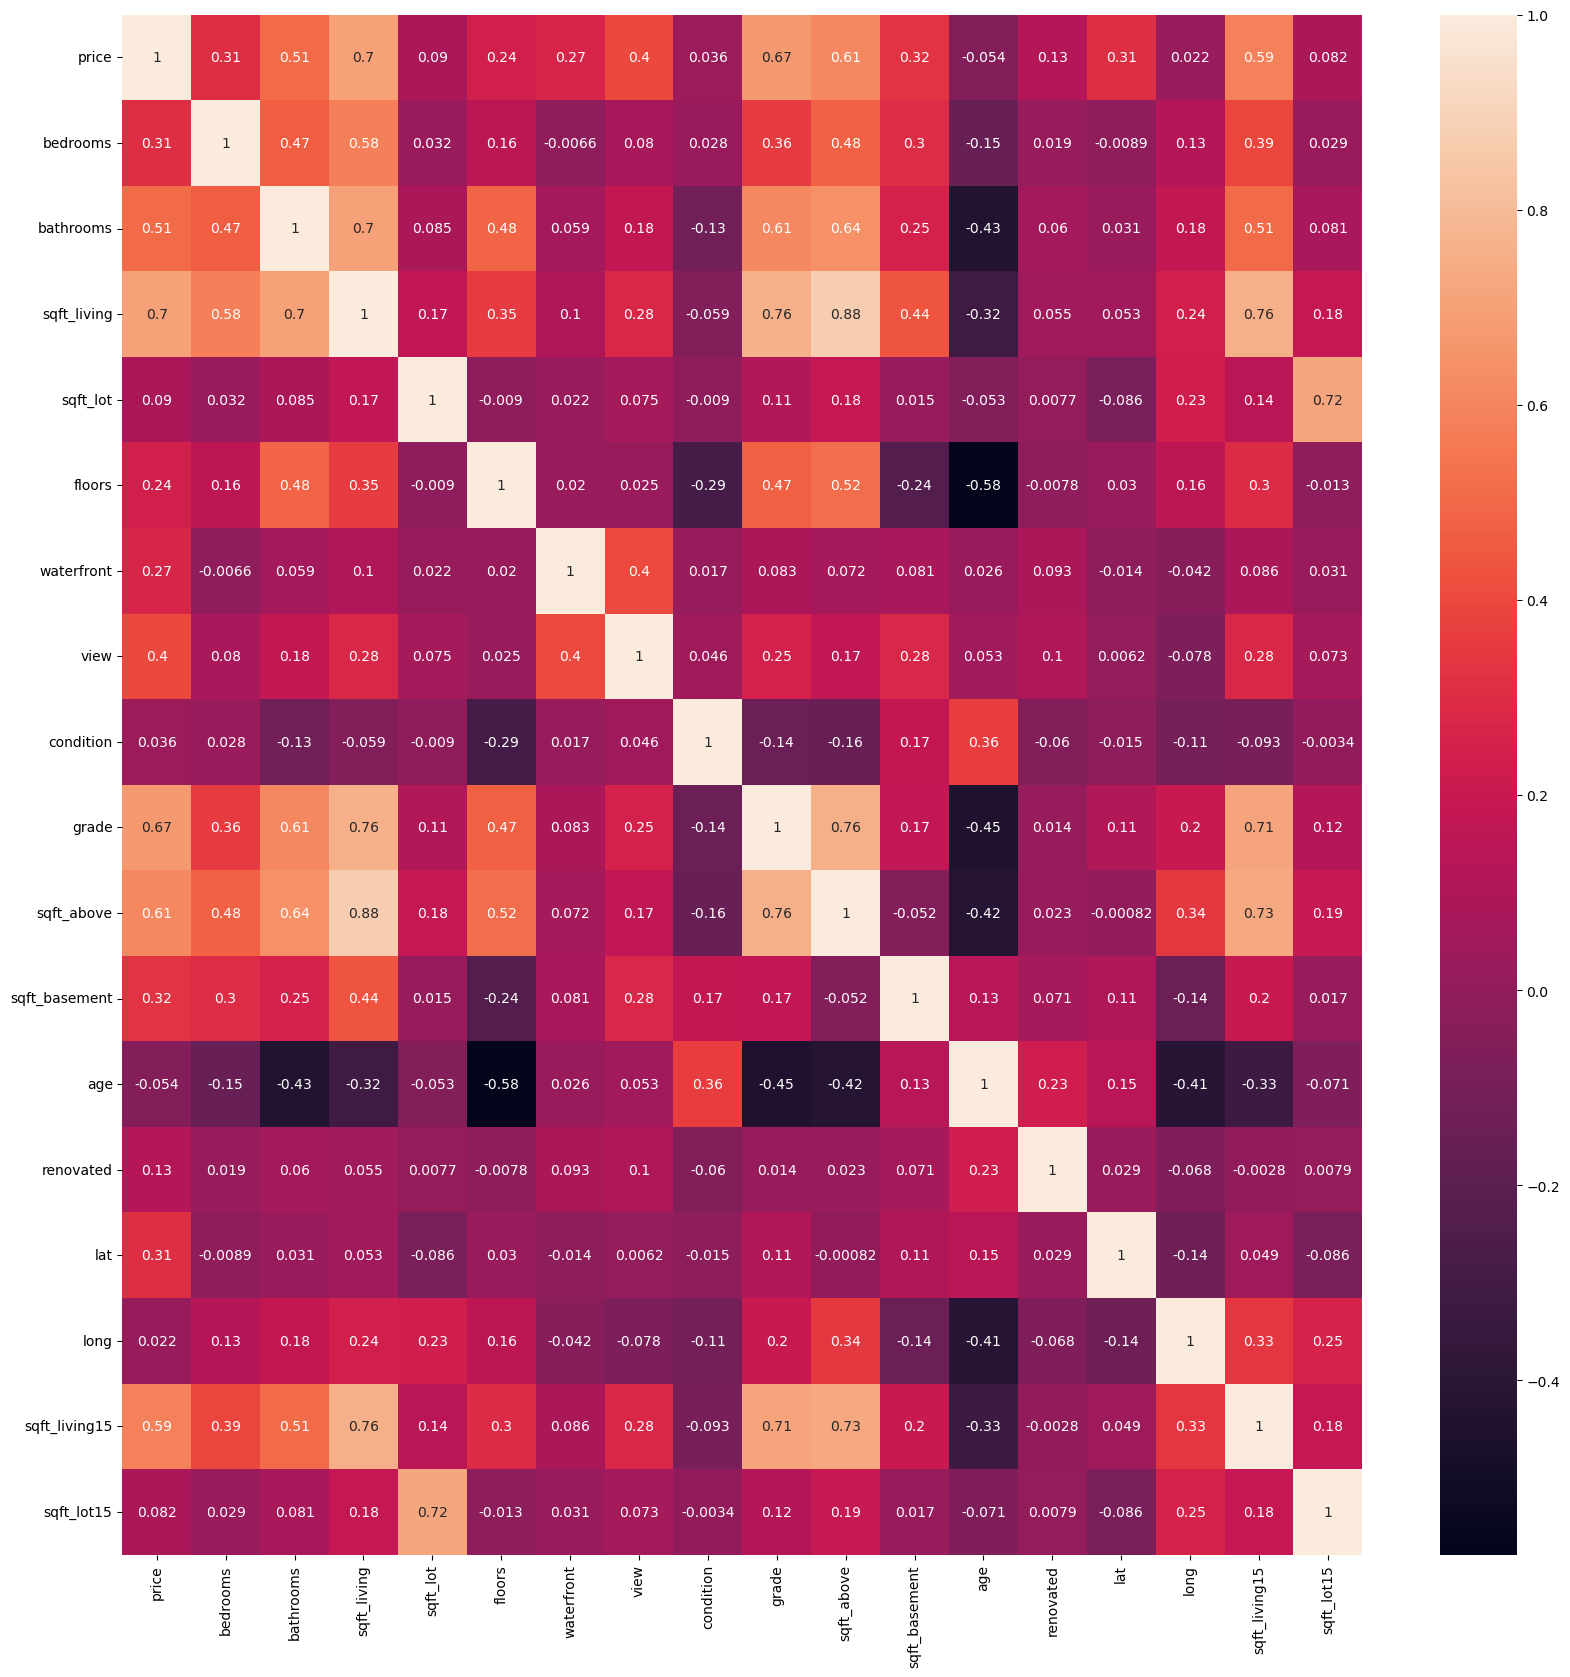

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

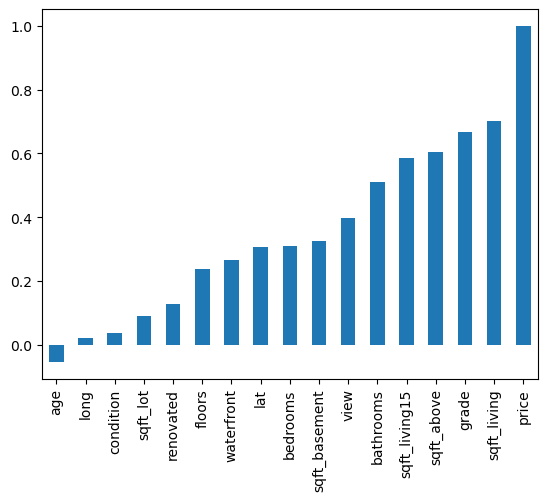

In [67]:
# Visuallise the correlation between factors and price
df.corr()['price'][:-1].sort_values().plot(kind='bar')

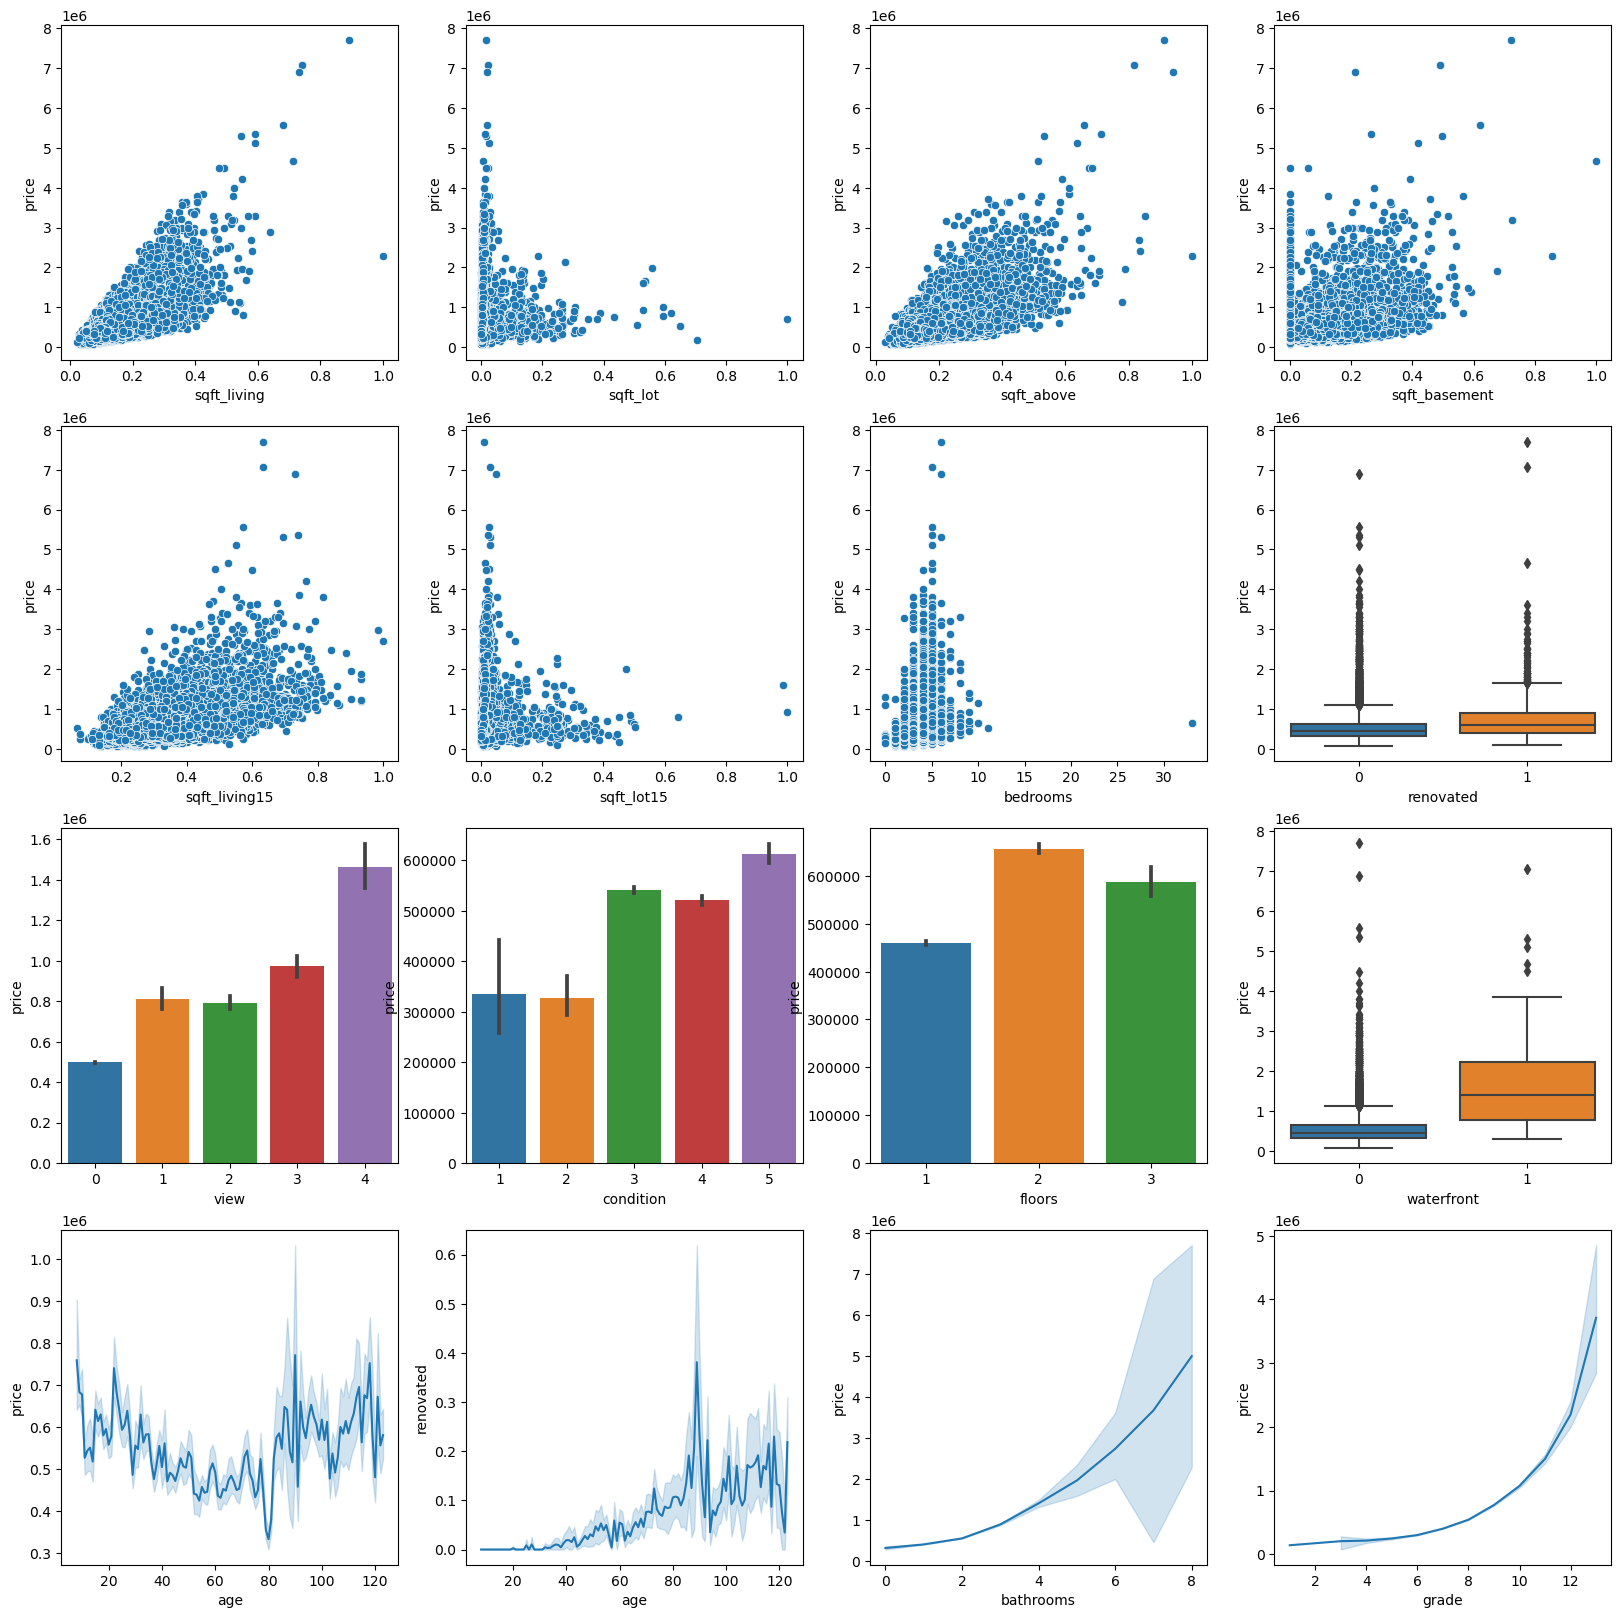

In [68]:
# visualizing the relation between price and sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, age, renovated, bedrooms, bathrooms, floors, waterfront, view, condition, grade
fig, ax = plt.subplots(4,4,figsize=(20,20))
sns.scatterplot( x = df['sqft_living'], y = df['price'],ax=ax[0,0])
sns.scatterplot( x = df['sqft_lot'], y = df['price'],ax=ax[0,1])
sns.scatterplot( x = df['sqft_above'], y = df['price'],ax=ax[0,2])
sns.scatterplot( x = df['sqft_basement'], y = df['price'],ax=ax[0,3])
sns.scatterplot( x = df['sqft_living15'], y = df['price'],ax=ax[1,0])
sns.scatterplot( x = df['sqft_lot15'], y = df['price'],ax=ax[1,1])
sns.scatterplot( x = df['bedrooms'], y = df['price'],ax=ax[1,2])
sns.boxplot( x = df['renovated'], y = df['price'],ax=ax[1,3])
sns.boxplot( x = df['waterfront'], y = df['price'],ax=ax[2,3])
sns.barplot( x = df['view'], y = df['price'],ax=ax[2,0])
sns.barplot( x = df['condition'], y = df['price'],ax=ax[2,1])
sns.barplot( x = df['floors'], y = df['price'],ax=ax[2,2])
sns.lineplot( x = df['age'], y = df['price'],ax=ax[3,0])
sns.lineplot( x = df['age'], y = df['renovated'],ax=ax[3,1])
sns.lineplot( x = df['bathrooms'], y = df['price'],ax=ax[3,2])
sns.lineplot( x = df['grade'], y = df['price'],ax=ax[3,3])
plt.show()

In [107]:
# adding a new column price_range and categorizing the price into 4 categories
df['price_range'] = pd.cut(df['price'],bins=[0,321950,450000,645000,1295648],labels=['Low','Medium','High','Very High'])

In [108]:
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(df[['lat', 'long']].values.tolist()).add_to(map)
map

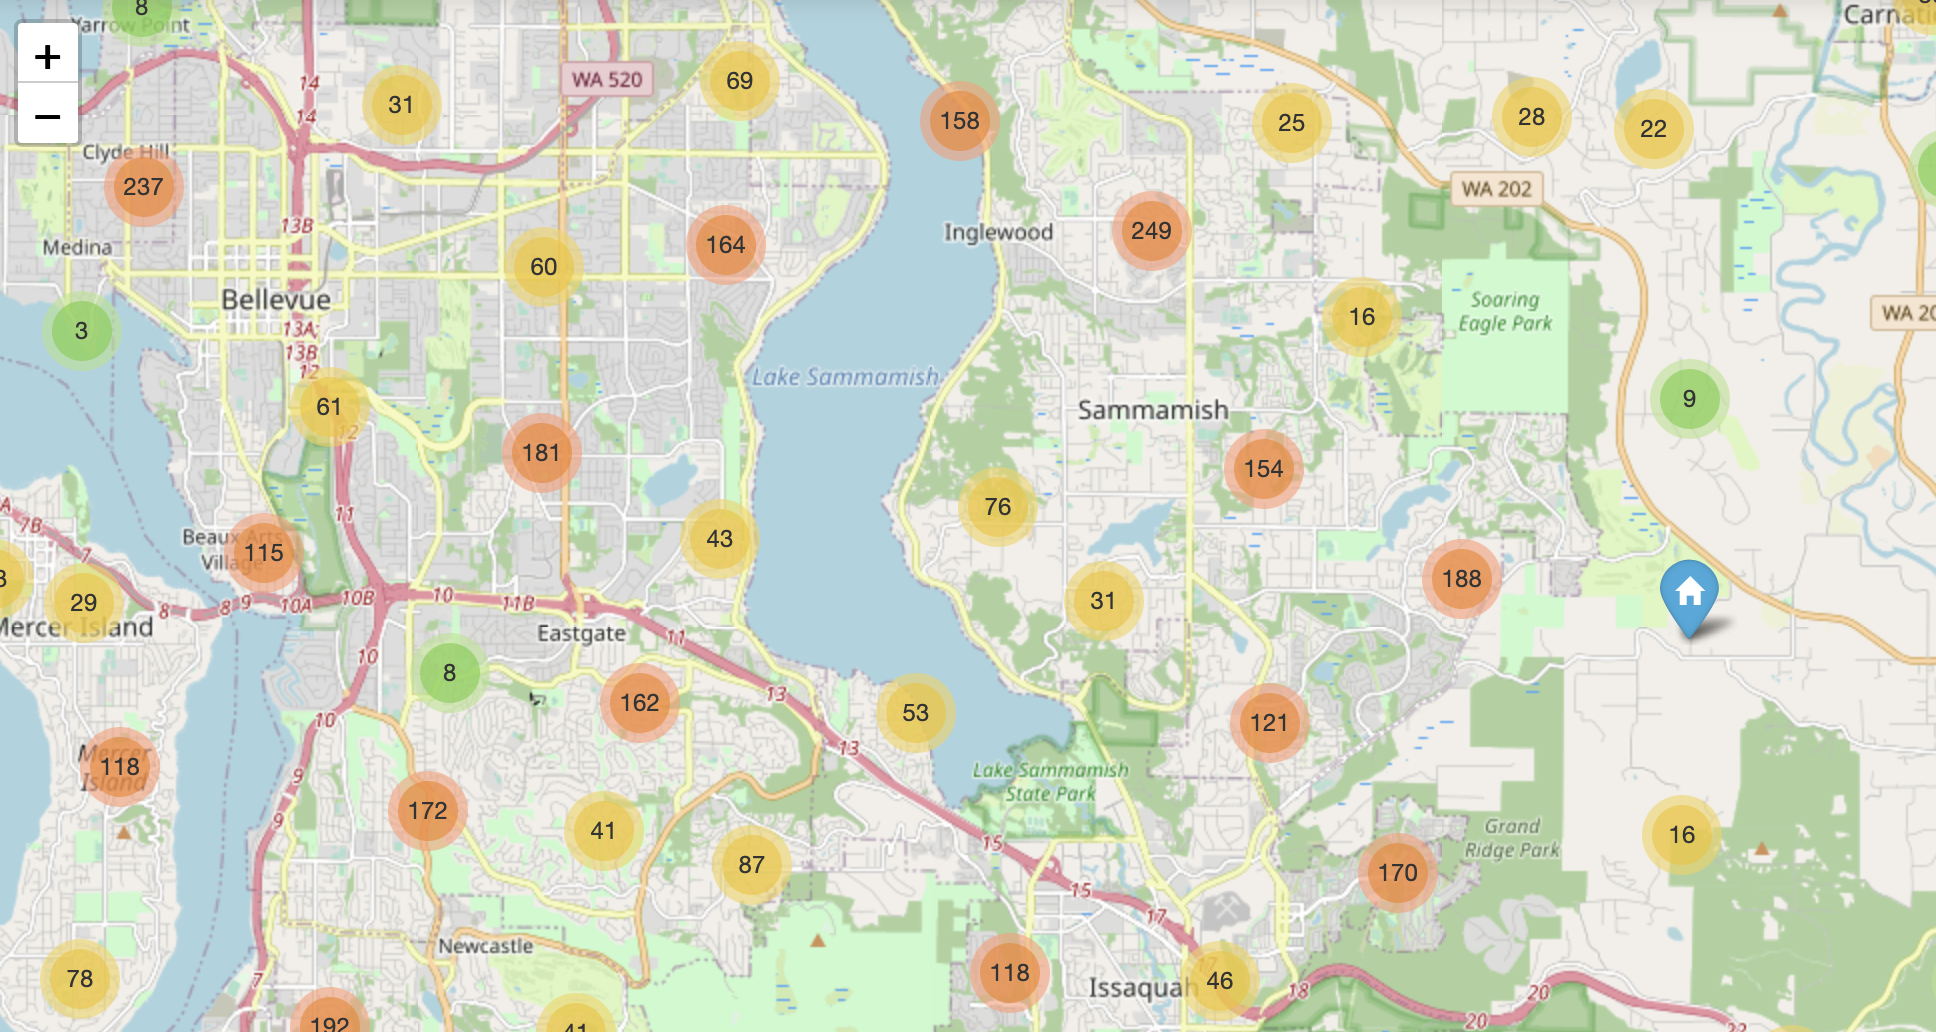

## 4. Model development


### 4.1. Using pipline to combine the transformers and estimators and fit the model

In [109]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] 
Y = df[['price']]
lm.fit(features, Y)
lm.score(features,Y)

print('The accuracy of using linear regression fitting is: ',lm.score(features,Y))

The accuracy of using linear regression fitting is:  0.6616025931364271


In [110]:
df.drop(['price_range'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.3,random_state=10)
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [111]:
#training the model
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8079779711873566

In [115]:
#testing the model
pipe_pred = pipe.predict(X_test)
r2_score(y_test,pipe_pred)
print('The pridiction accuracy using Pipline is : ', r2_score(y_test,pipe_pred))

The pridiction accuracy using Pipline is :  0.8079779711873566


### 4.2 Random forest 

In [117]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [119]:
# training the model
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.8765255737337226

In [121]:
#testing the model
yhat = regressor.predict(X_test)
r2_score(y_test,yhat)
print('The pridiction accuracy using RandomForest regressor is : ', r2_score(y_test,yhat))

The pridiction accuracy using RandomForest regressor is :  0.8765255737337226


### 4.3 Using Ridge Regression Method

In [124]:
Ridgemodel = Ridge (alpha = 0.001)
Ridgemodel

Ridge(alpha=0.001)

In [125]:
# training the model
Ridgemodel.fit(X_train,y_train)
Ridgemodel.score(X_test,y_test)

0.7069226712981387

In [127]:
#testing the model
r_pred = Ridgemodel.predict(X_test)
print('The pridiction accuracy using RandomForest regressor is : ', r2_score(y_test,r_pred))

The pridiction accuracy using RandomForest regressor is :  0.7069226712981387


## 5. Model eveluation and refinement

/tmp/ipykernel_3752/114450484.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,ax=ax[0])
/tmp/ipykernel_3752/114450484.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pipe_pred,ax=ax[0])
/tmp/ipykernel_3752/114450484.py:5: UserWarning: 

`distplot` is a deprecated function and will

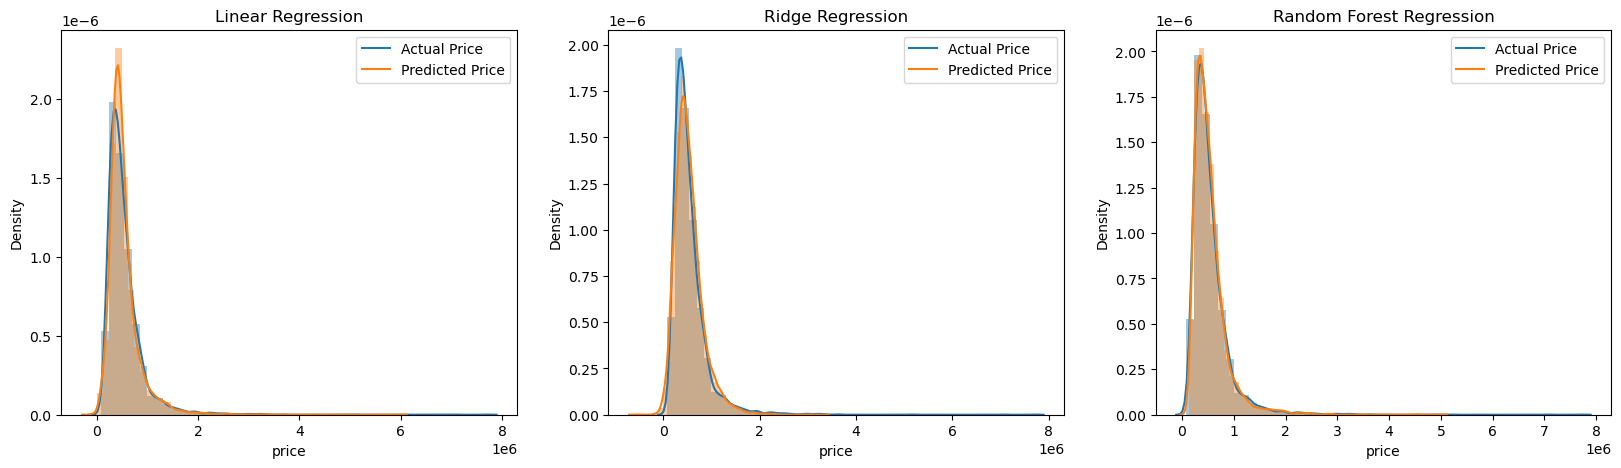

In [128]:
# displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(y_test,ax=ax[0])
sns.distplot(pipe_pred,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(r_pred,ax=ax[1])
sns.distplot(y_test,ax=ax[2])
sns.distplot(yhat,ax=ax[2])
# legends
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[2].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')
ax[2].set_title('Random Forest Regression')
plt.show()

### Error Evaluation 



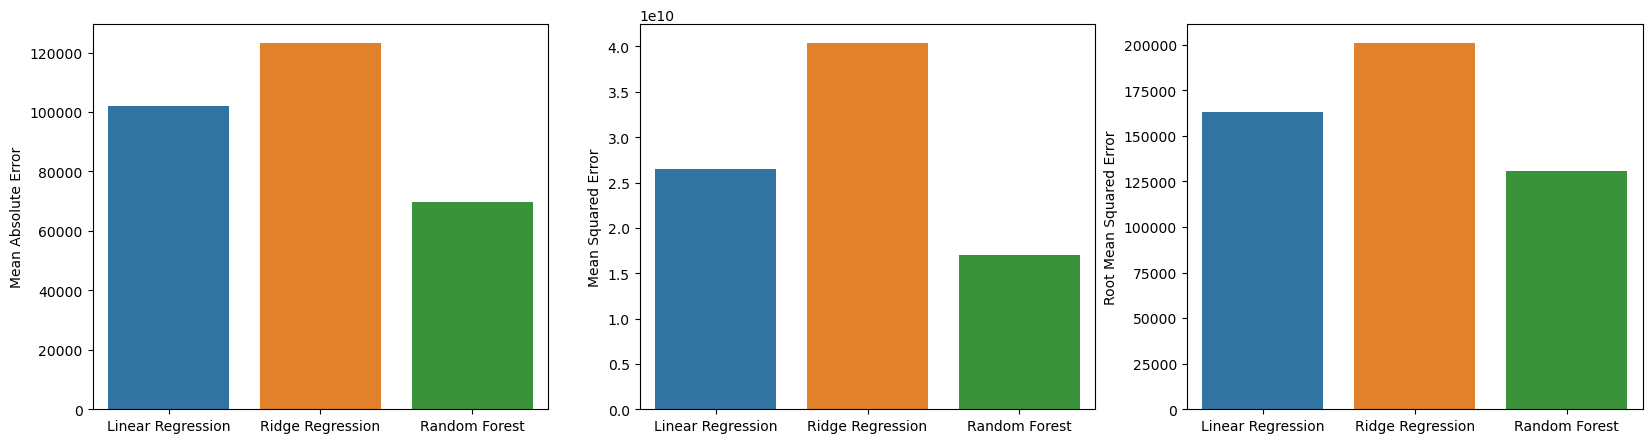

In [129]:
#plot the graph to compare mae, mse, rmse for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_absolute_error(y_test,pipe_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,yhat)],ax=ax[0])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_squared_error(y_test,pipe_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,yhat)],ax=ax[1])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[np.sqrt(mean_squared_error(y_test,pipe_pred)),np.sqrt(mean_squared_error(y_test,r_pred)),np.sqrt(mean_squared_error(y_test,yhat))],ax=ax[2])
# label for the graph
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_ylabel('Mean Squared Error')
ax[2].set_ylabel('Root Mean Squared Error')
plt.show()


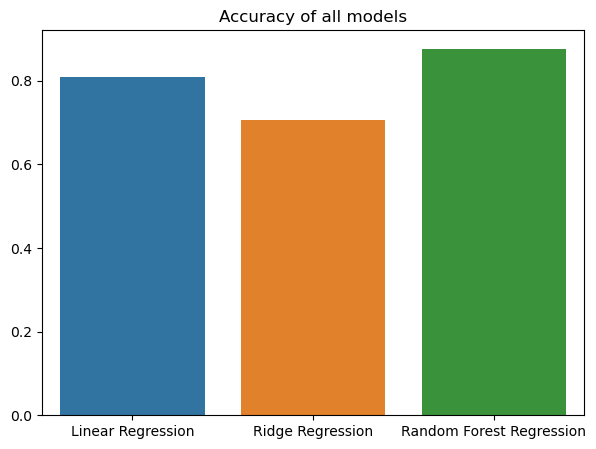

In [130]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression'],y=[metrics.r2_score(y_test,pipe_pred),metrics.r2_score(y_test,r_pred),metrics.r2_score(y_test,yhat)])
ax.set_title('Accuracy of all models')
plt.show()

## 6. Predicting the price of a new house

In [131]:
#input the values
bedrooms = 3
bathrooms = 2
sqft_living = 2000
sqft_lot = 10000
floors = 2
waterfront = 0
view = 0
condition = 3
grade = 8
sqft_above = 2000
sqft_basement = 0
yr_built = 1990
yr_renovated = 0
zipcode = 98001
lat = 47.5480
long = -121.9836
sqft_living15 = 2000
sqft_lot15 = 10000

In [133]:
#predicting the price using random forest regression
price = regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

The price of the house is $ 924875.76


/Users/hongyanwang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(




# Conclusion


    1. Three predicting technique: Polynomial Regression model, Ridge Regression model and Random forest model, are studied and compored. 

    2. From the analysis, it was found that the Random Forest Regression model performed better than the Ridge Regression model and Polynomial Regression model.

    3. By using the Folium lib, the location of the house corresponding to the price is ploted. And it was found that location is a very important factor in determining the price of the house.